In [39]:
import pandas as pd
import matplotlib.pyplot as plt







In [40]:
df = pd.read_excel("sample_data/vendas.xlsx")
print(df.info())
print(df.isna().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7225 entries, 0 to 7224
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Nº                   7225 non-null   int64         
 1   Data                 7225 non-null   datetime64[ns]
 2   Pedido               7225 non-null   int64         
 3   Razão Social | Nome  7225 non-null   object        
 4   Código               7123 non-null   float64       
 5   Nome do Produto      7218 non-null   object        
 6   Matéria Prima        7225 non-null   object        
 7   QTD                  7225 non-null   object        
 8   UN                   7216 non-null   object        
 9   Unitário             7225 non-null   object        
 10  Total                7225 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 621.0+ KB
None
Nº                       0
Data                     0
Pedido    

In [41]:
df['Total '] = df['Total '].str.replace(',','.')
df['QTD'] = df['QTD'].str.replace(',','.')
df['Unitário '] = df['Unitário '].str.replace(',','.')
df['Total '] = pd.to_numeric(df['Total '], errors= "coerce")
df['QTD'] = pd.to_numeric(df['QTD'], errors= "coerce")
df['Unitário '] = pd.to_numeric(df['Unitário '], errors= "coerce")
df = df.dropna(subset=['Código','Nome do Produto','UN', 'Unitário ', "Total "])
df = df.drop("Matéria Prima",axis=1)
dftotal= df['QTD'].sum()


print(df.info())
print(df.isna().sum())





<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7224
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Nº                   7109 non-null   int64         
 1   Data                 7109 non-null   datetime64[ns]
 2   Pedido               7109 non-null   int64         
 3   Razão Social | Nome  7109 non-null   object        
 4   Código               7109 non-null   float64       
 5   Nome do Produto      7109 non-null   object        
 6   QTD                  7109 non-null   float64       
 7   UN                   7109 non-null   object        
 8   Unitário             7109 non-null   float64       
 9   Total                7109 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 610.9+ KB
None
Nº                     0
Data                   0
Pedido                 0
Razão Social | Nome    0
Código               

PRODUTOS DE MAIOR RECEITA ANUAL


In [43]:
pedidosMaior_receita=pd.pivot_table(df,index=['Nome do Produto'], values='Total ', aggfunc='sum').sort_values(ascending=False,by='Total ')[:10]
print(pedidosMaior_receita)

                          Total 
Nome do Produto                 
CIMENTO CSN CPIII        26991.5
AREIA METRO              21087.5
RESINA CRISTAL           10640.0
TIJOLO GRANDE             9393.6
SERRA MARMORE 110V        5480.0
PEDRA METRO               5050.0
ARGAMASSA EXT/INT CINZA   4470.0
TABUA 30CM                4177.0
CUBA PROJINOX N1 14CM     4150.0
SILICONE PU BRANCO        4139.0


GRAFICO DE BARRAS QUE REPRESENTA MAIOR RECEITA BRUTA

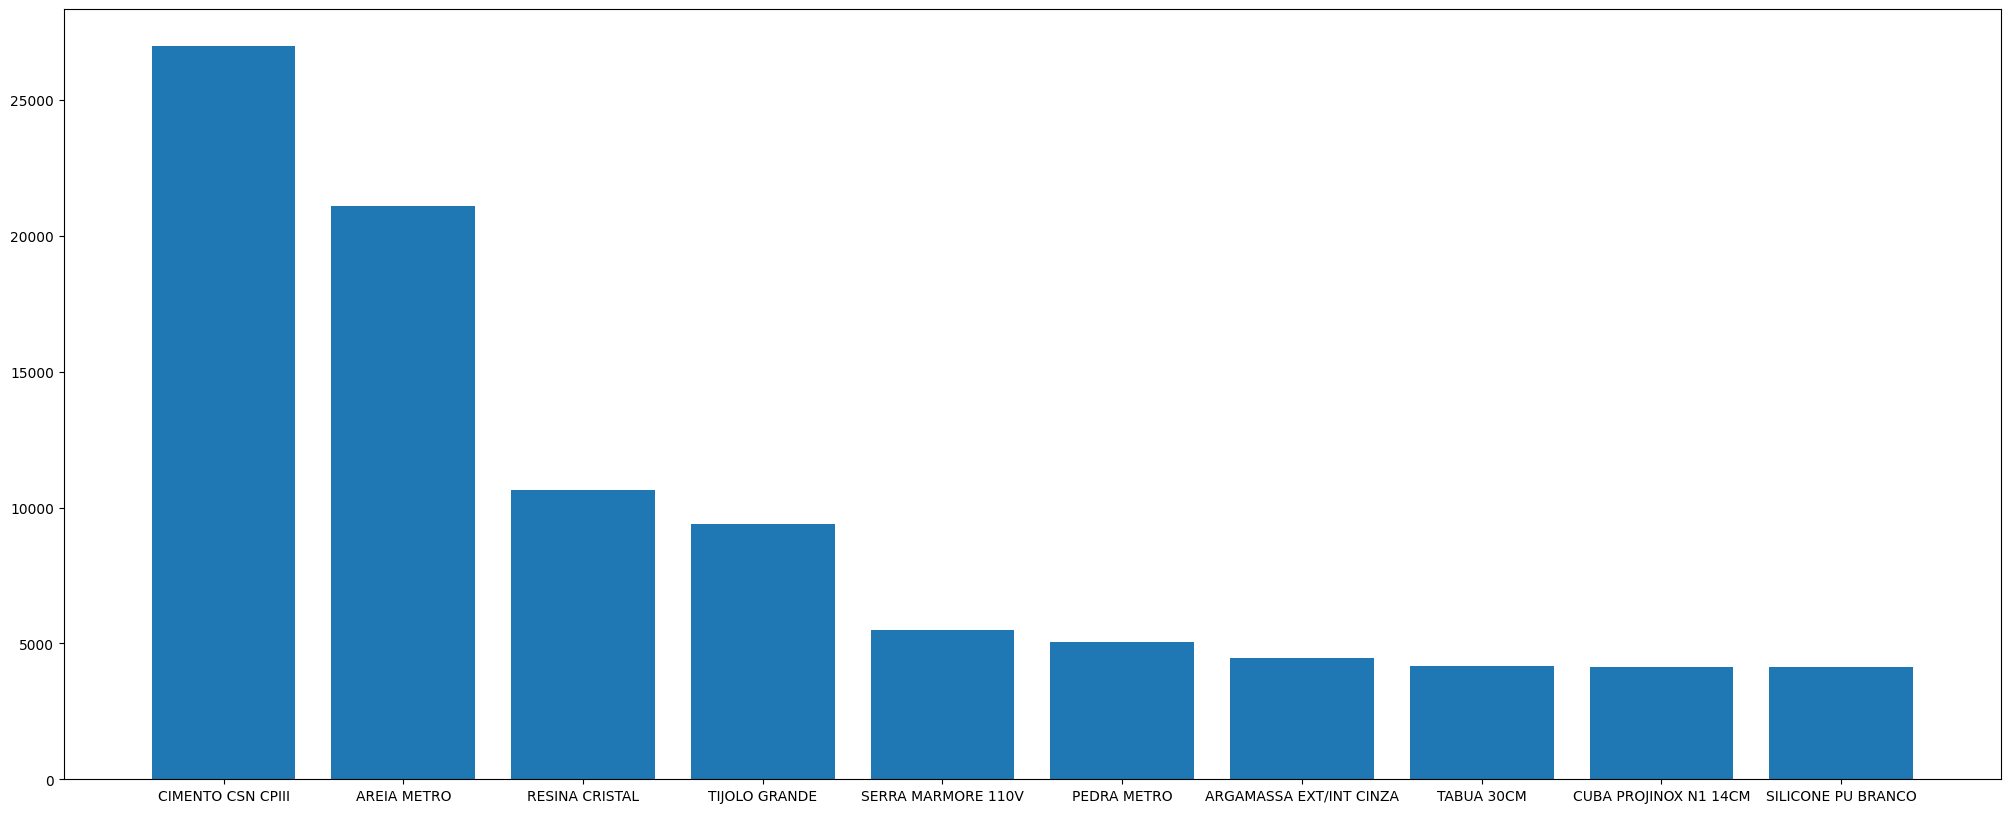

In [44]:
plt.figure(figsize=(25,10))
plt.bar(pedidosMaior_receita.index,pedidosMaior_receita['Total '])
plt.show()

MAIOR QUANTIDADE VENDIDA DE PRODUTOS

In [45]:
produtoMaior_vendaQtd=pd.pivot_table(df,index=['Nome do Produto'], values='QTD', aggfunc='sum').sort_values(ascending=False,by='QTD')[:10]
print(produtoMaior_vendaQtd)

                          QTD
Nome do Produto              
TIJOLO GRANDE          6088.0
AREIA LAVADA SACO      1718.0
TIJOLO PEQUENO         1295.0
CIMENTO CSN CPIII       906.0
ARGILA                  503.0
CARTELA                 439.0
SACO DE RAFIA           350.0
ARGAMASSA ACI INTERNA   324.0
CIMENTO KILO            290.0
PEDRA SACO              227.0


GRAFICO DE BARRAS PARA PRODUTOS MAIS VENDIDOS EM QTD


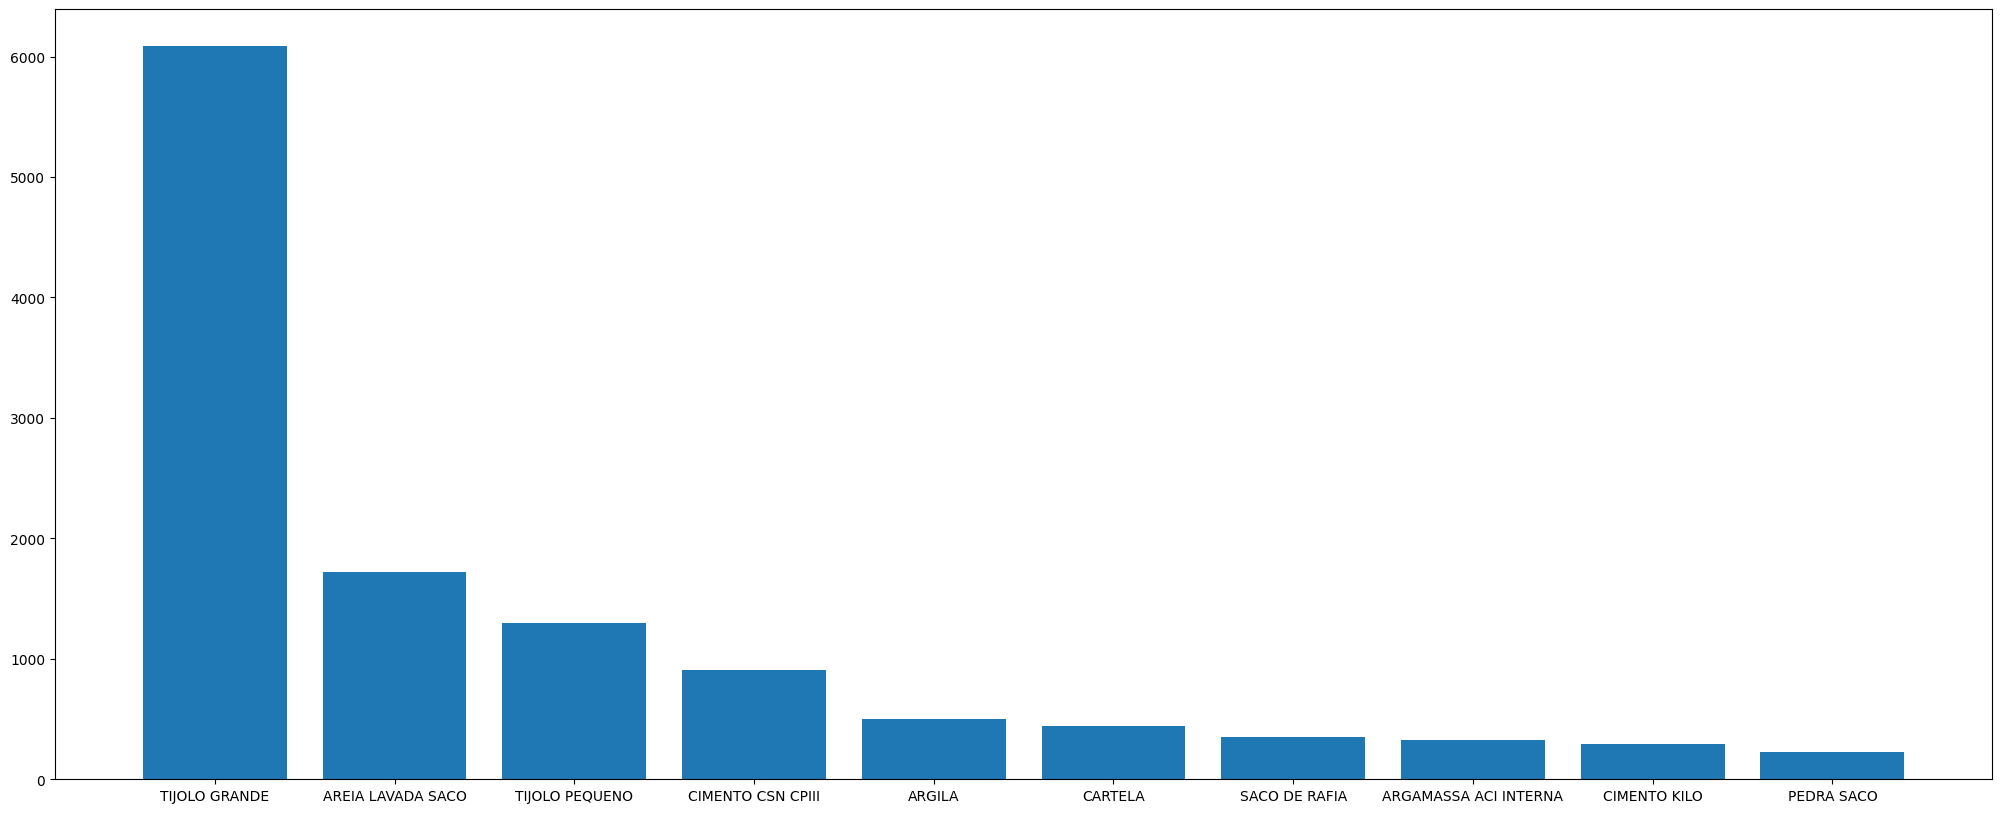

In [46]:
plt.figure(figsize=(25,10))
plt.bar(produtoMaior_vendaQtd.index,produtoMaior_vendaQtd['QTD'])
plt.show()


FATURAMENTO MENSAL




In [48]:
ProdutosMes= df.groupby(df['Data'].dt.month)['Total '].sum()
display(ProdutosMes)
ProdutosMes.values
ProdutosMes.index

Data
1     28761.97
2     17595.88
3     32479.20
4     22023.60
5     34276.05
6     28252.60
7     34680.71
8     32697.00
9     30266.04
10    25605.70
11     1216.60
Name: Total , dtype: float64

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='Data')

GRAFICO DE FATURAMENTO MENSAL

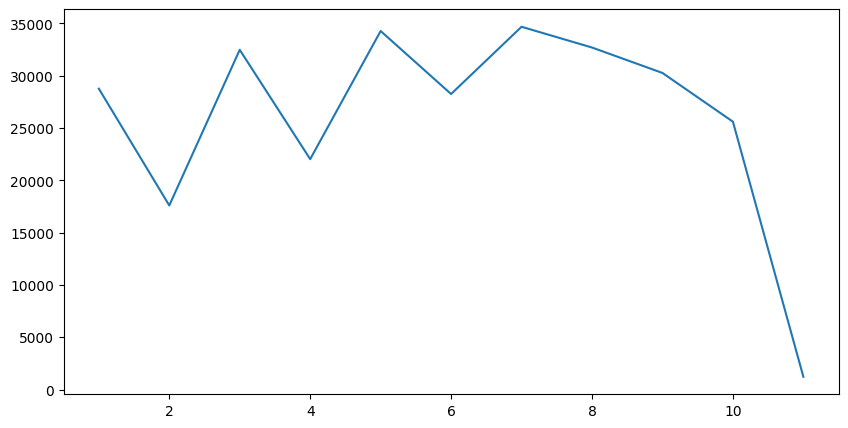

In [49]:
plt.figure(figsize=(10,5))
plt.plot(ProdutosMes.index,ProdutosMes.values)
plt.show()


LEVANTAMENTO ANUAL DE VENDAS POR PRODUTO


In [53]:
Produto = df[df['Nome do Produto'] == 'CIMENTO CSN CPIII'].groupby(df['Data'].dt.month)['Total '].sum()
display(Produto)



Data
1     3539.5
2     1126.0
3     2104.0
4     2142.0
5     4747.0
6     2813.5
7     3714.5
8     2643.0
9     1965.5
10    2166.5
11      30.0
Name: Total , dtype: float64

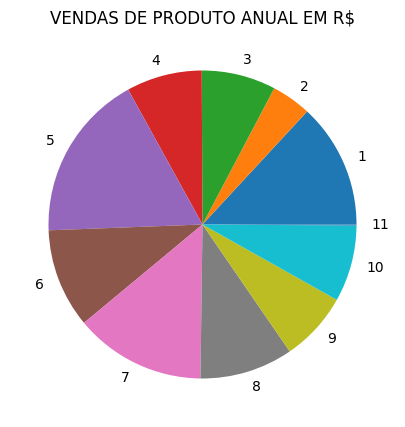

In [54]:
fig, ax = plt.subplots(figsize=(15,5))
mes = Produto.index
valor = Produto.values
ax.pie(valor, labels=mes)
plt.title('VENDAS DE PRODUTO ANUAL EM R$')
plt.show()


PRODUTOS DE MENOR RECEITA

In [52]:
pedidosMenor_receita=pd.pivot_table(df,index=['Nome do Produto'], values='Total ', aggfunc='sum').sort_values(ascending=True,by='Total ')[:10]
display(pedidosMenor_receita)

,Total
Nome do Produto,
JOELHO 45 SOLDAVEL 20MM,0.85
LIXA MADEIRIRA/PAREDE 180 CA,1.00
ANEL DE VEDAÇAO 40MM,1.00
LUVA SOLDAVEL 20MM,1.00
LUVA ESGOTO 40MM,1.00
JOELHO,1.00
CARRAPETA P/TORN 1/2,1.00
BUCHA REDUCAO ROSC.3/4X1/2,1.00
ABRAC.TIPO COPO 1/2,1.50
